In [13]:
def eq(s,d):
  return 0.1*(s**2)+0.5*d
def derS(s):
  return (2*0.1)*s
def momS(vs,s):
  return 0.9*(vs)+(1-0.9)*s
def derD(d):
  return 0.5
def momD(vd,d):
  return 0.9*(vd)+(1-0.9)*d
def time(s,d):
  return (d/s)+(0.1*d)
def GDwM(epoch,s,d):
  output=eq(s,d)
  vs=0
  vd=0
  for i in range(epoch):
    vs=s
    vd=d
    ds=s-(0.01*derS(s))
    dd=d-(0.01*derD(d))
    s=momS(vs,ds)
    d=momD(vd,dd)
    cost=eq(s,d)
    Time=time(s,d)
    print("For SPEED: ",s," DIST: ",d," COST : ",cost," TIME: ",Time)
    print("\n--------------------\n")
GDwM(5,50,100)

For SPEED:  49.989999999999995  DIST:  99.9995  COST :  299.89975999999996  TIME:  12.000340078015604

--------------------

For SPEED:  49.980002  DIST:  99.999  COST :  299.7995599920004  TIME:  12.000680232061615

--------------------

For SPEED:  49.9700059996  DIST:  99.99849999999999  COST :  299.69939996000596  TIME:  12.001020462152846

--------------------

For SPEED:  49.96001199840008  DIST:  99.99799999999999  COST :  299.5992798880279  TIME:  12.001360768304107

--------------------

For SPEED:  49.95001999600039  DIST:  99.9975  COST :  299.4991997600839  TIME:  12.001701150530211

--------------------



In [51]:
import pandas as pd
df=pd.read_csv("/content/GME_stock - GME_stock.csv")
df

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300,65.010002
...,...,...,...,...,...,...,...
4768,2002-02-20,9.600000,9.875000,9.525000,9.875000,1723200,6.648838
4769,2002-02-19,9.900000,9.900000,9.375000,9.550000,1852600,6.430017
4770,2002-02-15,10.000000,10.025000,9.850000,9.950000,2097400,6.699336
4771,2002-02-14,10.175000,10.195000,9.925000,10.000000,2755400,6.733003


In [20]:
df.isnull().sum()

date              0
open_price        0
high_price        0
low_price         0
close_price       0
volume            0
adjclose_price    0
dtype: int64

In [21]:
df.describe()

,open_price,high_price,low_price,close_price,volume,adjclose_price
count,4773.000000,4773.000000,4773.000000,4773.000000,4.773000e+03,4773.000000
mean,23.201005,23.693590,22.714309,23.193234,3.398255e+06,16.882897
std,14.695884,16.210219,13.628194,14.513893,6.547035e+06,11.019953
min,2.850000,2.940000,2.570000,2.800000,6.500000e+04,2.555174
25%,11.360000,11.575000,11.130000,11.350000,1.528900e+06,9.607993
50%,21.760000,22.110001,21.430000,21.760000,2.491800e+06,15.479172
75%,29.420000,30.170000,28.719999,29.430000,3.791600e+06,22.205433
max,354.829987,483.000000,249.000000,347.510010,1.967843e+08,347.510010


In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(2, 250))
df['volume'] = scaler.fit_transform(df[['volume']])
df['volume']

0        76.065933
1       119.661366
2       227.060297
3       226.160171
4       250.000000
           ...    
4768      4.090459
4769      4.253591
4770      4.562205
4771      5.391732
4772     25.939044
Name: volume, Length: 4773, dtype: float64

In [21]:
df.dtypes

date            object
open_price     float64
high_price     float64
low_price      float64
close_price    float64
volume         float64
dtype: object

In [53]:
y=df[['adjclose_price']]
df.drop('adjclose_price',axis=1,inplace=True)
df.drop('date',axis=1,inplace=True)
x=df

In [54]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

DROPOUT

In [60]:
model = Sequential()
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])
drop_out_history = model.fit(xtrain,ytrain,epochs=10,validation_data = (xtest,ytest))
_, train_mse = model.evaluate(xtrain,ytrain)
_, test_mse = model.evaluate(xtest,ytest)
print('Train: {}, Test: {}'.format(train_mse, test_mse))
ypred= model.predict(xtest)
DropMSE=mean_squared_error(ytest,ypred)

Epoch 1/10
120/120 [==============================] - 2s 6ms/step - loss: 44.3604 - mse: 44.3604 - val_loss: 8.5863 - val_mse: 8.5863
Epoch 2/10
120/120 [==============================] - 1s 6ms/step - loss: 28.6895 - mse: 28.6895 - val_loss: 10.8821 - val_mse: 10.8821
Epoch 3/10
120/120 [==============================] - 1s 7ms/step - loss: 35.8107 - mse: 35.8107 - val_loss: 13.5628 - val_mse: 13.5628
Epoch 4/10
120/120 [==============================] - 1s 4ms/step - loss: 25.0527 - mse: 25.0527 - val_loss: 119.9370 - val_mse: 119.9370
Epoch 5/10
120/120 [==============================] - 0s 4ms/step - loss: 48.8851 - mse: 48.8851 - val_loss: 50.8784 - val_mse: 50.8784
Epoch 6/10
120/120 [==============================] - 0s 4ms/step - loss: 23.3966 - mse: 23.3966 - val_loss: 20.9949 - val_mse: 20.9949
Epoch 7/10
120/120 [==============================] - 0s 4ms/step - loss: 33.8230 - mse: 33.8230 - val_loss: 19.1265 - val_mse: 19.1265
Epoch 8/10
120/120 [============================

In [80]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

L1

In [81]:
model = Sequential()
model.add(Dense(128, input_dim=xtrain.shape[1], activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
mt = model.fit(xtrain, ytrain, epochs=10, validation_split=0.2)
ypred=model.predict(xtest)
L1MSE=mean_squared_error(ytest,ypred)

Epoch 1/10
96/96 [==============================] - 2s 7ms/step - loss: 24.3897 - mse: 18.2150 - val_loss: 18.2708 - val_mse: 13.5252
Epoch 2/10
96/96 [==============================] - 1s 6ms/step - loss: 7.0204 - mse: 2.8876 - val_loss: 21.7315 - val_mse: 17.9207
Epoch 3/10
96/96 [==============================] - 0s 4ms/step - loss: 6.3630 - mse: 2.6438 - val_loss: 16.3016 - val_mse: 12.6747
Epoch 4/10
96/96 [==============================] - 0s 4ms/step - loss: 6.7187 - mse: 3.1757 - val_loss: 20.8082 - val_mse: 17.3343
Epoch 5/10
96/96 [==============================] - 0s 4ms/step - loss: 6.3042 - mse: 2.8695 - val_loss: 18.0628 - val_mse: 14.6800
Epoch 6/10
96/96 [==============================] - 0s 4ms/step - loss: 5.6735 - mse: 2.3574 - val_loss: 23.9014 - val_mse: 20.6338
Epoch 7/10
96/96 [==============================] - 0s 4ms/step - loss: 5.6591 - mse: 2.4184 - val_loss: 19.9225 - val_mse: 16.7038
Epoch 8/10
96/96 [==============================] - 0s 4ms/step - loss: 5.

L2

In [64]:
model2 = Sequential()
model2.add(Dense(128, input_dim=xtrain.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dense(1, activation='linear'))
model2.compile(optimizer='adam', loss='mse', metrics=['mse'])
mt2 = model2.fit(xtrain, ytrain, epochs=10, validation_split=0.2)
ypred=model2.predict(xtest)
L2MSE=mean_squared_error(ytest,ypred)

Epoch 1/10
96/96 [==============================] - 1s 5ms/step - loss: 21.4234 - mse: 20.7240 - val_loss: 17.1650 - val_mse: 16.6190
Epoch 2/10
96/96 [==============================] - 1s 7ms/step - loss: 2.8932 - mse: 2.3932 - val_loss: 17.9634 - val_mse: 17.4899
Epoch 3/10
96/96 [==============================] - 0s 4ms/step - loss: 2.8746 - mse: 2.4109 - val_loss: 15.4699 - val_mse: 15.0129
Epoch 4/10
96/96 [==============================] - 0s 4ms/step - loss: 2.9247 - mse: 2.4720 - val_loss: 18.2706 - val_mse: 17.8217
Epoch 5/10
96/96 [==============================] - 0s 4ms/step - loss: 2.7094 - mse: 2.2648 - val_loss: 17.4342 - val_mse: 16.9937
Epoch 6/10
96/96 [==============================] - 0s 4ms/step - loss: 2.6729 - mse: 2.2362 - val_loss: 18.6927 - val_mse: 18.2601
Epoch 7/10
96/96 [==============================] - 0s 5ms/step - loss: 2.7629 - mse: 2.3334 - val_loss: 18.2556 - val_mse: 17.8286
Epoch 8/10
96/96 [==============================] - 0s 5ms/step - loss: 2.

ELASTIC NET

In [65]:
model3 = Sequential()
model3.add(Dense(128, input_dim=xtrain.shape[1], activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model3.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model3.add(Dense(1, activation='linear'))
model3.compile(optimizer='adam', loss='mse', metrics=['mse'])
mt3 = model3.fit(xtrain, ytrain, epochs=10, validation_split=0.2)
ypred=model3.predict(xtest)
ElasticMSE=mean_squared_error(ytest,ypred)

Epoch 1/10
96/96 [==============================] - 1s 5ms/step - loss: 26.7296 - mse: 20.3664 - val_loss: 20.7605 - val_mse: 16.3271
Epoch 2/10
96/96 [==============================] - 0s 4ms/step - loss: 5.9591 - mse: 2.4036 - val_loss: 19.1480 - val_mse: 16.0785
Epoch 3/10
96/96 [==============================] - 0s 4ms/step - loss: 5.3976 - mse: 2.4722 - val_loss: 19.0623 - val_mse: 16.2794
Epoch 4/10
96/96 [==============================] - 0s 4ms/step - loss: 5.0741 - mse: 2.3791 - val_loss: 20.1186 - val_mse: 17.5074
Epoch 5/10
96/96 [==============================] - 0s 4ms/step - loss: 4.8272 - mse: 2.3048 - val_loss: 21.6291 - val_mse: 19.1743
Epoch 6/10
96/96 [==============================] - 0s 4ms/step - loss: 4.6497 - mse: 2.2488 - val_loss: 20.7776 - val_mse: 18.4189
Epoch 7/10
96/96 [==============================] - 1s 5ms/step - loss: 4.7685 - mse: 2.4448 - val_loss: 18.5749 - val_mse: 16.2849
Epoch 8/10
96/96 [==============================] - 1s 5ms/step - loss: 4.

DROPOUT MSE:  31.312854768476242
L1 MSE:  4.234106385797206
L2 MSE:  3.978566250049303
ElasticNet MSE:  4.472003485496963


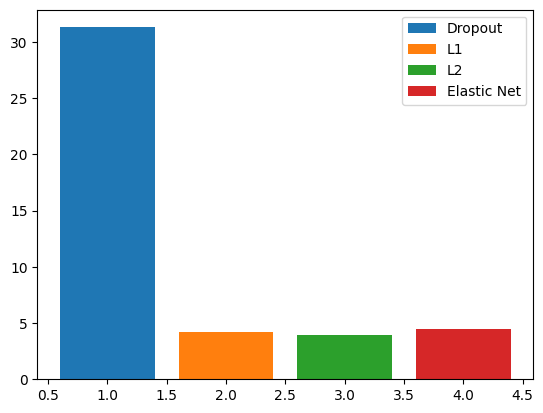

In [79]:
print("DROPOUT MSE: ",DropMSE)
print("L1 MSE: ",L1MSE)
print("L2 MSE: ",L2MSE)
print("ElasticNet MSE: ",ElasticMSE)
plt.bar(1,DropMSE,label='Dropout')
plt.bar(2,L1MSE,label='L1')
plt.bar(3,L2MSE,label='L2')
plt.bar(4,ElasticMSE,label='Elastic Net')
plt.legend()